# Introducción

En este documento desarrollaremos algunas temas, desarrollados en Python, que son complementarios al curso de Pensamiento Matemático 1.

Empezaremos con funciones exponenciales, con aplicaciones a cálculo de interés compuesto; cálculo de anualidades, entre otros.

Después, continuaremos con derivadas y aplicaciones.

Iniciamos importando los módulos necesarios.

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Funciones exponenciales
Una función exponencial 
$$
    f(x) = A b^x,
$$
donde $A$, $b$ son números reales. 

Consideramos, por ejemplo, $A=3$, $b=1.2$, con $-4 \le x \le 5$.

In [2]:
A = 3
b = 1.2
x = np.linspace(-4,5,100)
y = A*b**x

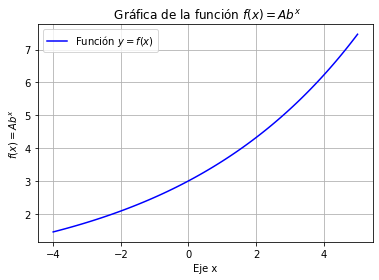

In [3]:
plt.plot(x, y, '-b', label = 'Función $y = f(x)$')
plt.xlabel('Eje x')
plt.ylabel('$f(x) = Ab^x$')
plt.grid(True)
plt.legend()
plt.title(' Gráfica de la función $f(x) = A b^x$')
plt.show()

## Interés compuesto

Supón que invertimos un monto $P$ en un activo que paga un interés anual $r=.07$ (que corresponde a un 7% anual).

Después de un año, el monto resultante será igual a 
$$
    S_1 = P (1+.07) .
$$
Después de dos años, el monto resultante (asumiendo que se reinvierta todo $S_1$) será
$$
    S_2 = S_1 (1 + .07) = P(1 + .07)^2 .
$$
Después $n$ años,
$$
    S_n = P ( 1 + .07)^n .
$$

Graficamos $S(t)$, como una función del tiempo $0 < t < 20$, con $P=12$ (unidades monetarias), para visualizar el crecimiento del dinero en el tiempo.

La función $S(t)$ se conoce como el _valor futuro_ del principal $P$.

In [4]:
r = .07
P = 12
t = np.linspace(0,20,100)
St = P*( 1 + r)**t

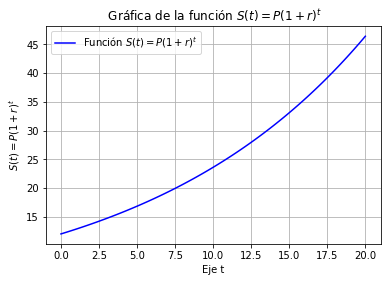

In [5]:
plt.plot(t, St, '-b', label = 'Función $S(t) = P(1 + r)^t$')
plt.xlabel('Eje t')
plt.ylabel('$S(t) = P(1 + r)^t$')
plt.grid(True)
plt.legend()
plt.title(' Gráfica de la función $S(t) = P(1 + r)^t$')
plt.show()

Supón que el interés del 7% ($r=.07$) se capitaliza trimestralmente; entonces, 
$$
    T(t) = P \left( 1 + \frac{r}{4}\right)^{4t}
$$
La función $T(t)$ es el valor futuro con interés $r = .07$, capitalizado _trimestralmente_.

In [6]:
Tt = P*( 1 + r/4)**(4*t)

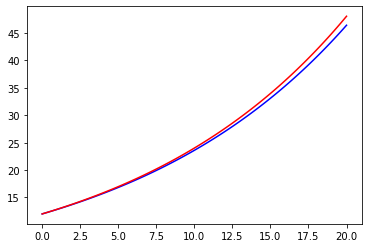

In [7]:
plt.plot(t, St, '-b')
plt.plot(t, Tt, '-r')
plt.show()

Supón que el interés del 7% ($r=.07$) se capitaliza mensualmente; entonces, 
$$
    M(t) = P \left( 1 + \frac{r}{12}\right)^{12 t}
$$
La función $M(t)$ es el valor futuro con interés $r = .07$, capitalizado _mensualmente_.

Si se dejara que la frecuencia de capitalización, $n$, se incrementara cada vez más, $n \to \infty$, entonces resulta
$$
    \lim_{n \to \infty} P \left( 1 + \frac{r}{n}\right)^{n t} = e^{r t}
$$
En este último caso, se dice que el interés se capitaliza _continuamente_.

A continuación, se presentan por simplicidad de visualización sólo las gráficas del interés capitalizado mensualmente y continuamente.

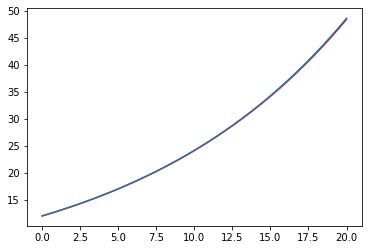

In [8]:
Mt = P*( 1 + r/12)**(12*t)
plt.plot(t, Mt, 'r')
plt.plot(t, P*np.exp(r*t))
plt.show()

## Plan de ahorro

En un plan de ahorro, se deposita un monto constante, $A$, periodicamente, al inicio de cada año; considerando un horizonte de planeación de $n$ años, tendremos un flujo de depósitos desde $t=0$ (inicio del primer año) hasta $t=n-1$ (inicio del último año del plan):
$$ 
    t = 0:\ S_1 = A(1 + r)^n
$$
hasta 
$$
    t = n-1 :\ S_n = A(1 + r) 
$$
Los montos parciales, $S_i$, constituyen una serie (o progresión) geométrica. 

El monto total, al término del año $N$, será
$$
    S = \sum_{i = 1}^n S_i = \sum_{i=1}^n A (1 + r)^i = A \left( \frac{1+r}{r} \right)
    \left[ (1+r)^n - 1 \right] .
$$
A continuación, presentamos 

- una _list comprehension_, que es una manera rápida de generar una lista, para los montos intermedios $S_i$;

- una función para poder calcular el monto total al término del horizonte del plan.

### List comprehension

Declaramos los parámetros del plano, _e.g._, $A = 500$ (pesos anuales), $n = 10$, $r = .08$ (tasa anual):

In [9]:
A = 500
n = 10
r = .08
montos_parciales = [A * (1+r)**(10-i) for i in range(n)]
montos_parciales

[1079.462498636394,
 999.5023135522166,
 925.4651051409413,
 856.9121343897605,
 793.4371614720003,
 734.6640384000003,
 680.2444800000002,
 629.8560000000001,
 583.2,
 540.0]

La función `range(n)` tiene valores de $0$ hasta $n-1$; de esta manera, el exponente, $10-i$, permite el cálculo de montos desde el tiempo $t=0$ hasta $t = 10$.

#### Suma de un list comprehension

Para sumar los elementos de un _list comprehension_ no se puede usar `sum()` directamente. Conviene usar el método `reduce` del módulo `functools` aplicado a una función (anónima) `lambda`; para una discusión de las funciones `lambda` pueden revisar esta liga: 
https://medium.com/better-programming/lambda-map-and-filter-in-python-4935f248593

In [10]:
import functools
functools.reduce(lambda a, b: a + b, montos_parciales)

7822.743731591313

### Función

El cálculo del monto final al término del horizonte de ahorro lo podemos calcular también definiendo una función apropiada en Python. En la segunda línea del código se pone la fórmula que obtuvimos arriba, con los valores apropiados de `A`, `n` y `r`; en la tercera línea se despliega el resultado.  

In [11]:
def ahorro(A,n,r):
    S = A * (1+r)/r * ((1.08) ** n - 1)  
    print(S)

El mismo cálculo del monto final que hicimos con la _list comprehension_ se realiza usando `ahorro(15,10,.08)`:

In [12]:
ahorro(500,10,.08)

7822.74373159132


# Funciones elementales

## Polinomios

Entre las funciones más comunes, se encuentran los polinomios. Un polinomio de grado $n$ ($n$ entero) es
$$
    p(x) = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_1 x_1 + a_0, \ a_n\neq 0.
$$
Un polinomio de grado $n$ está determinado por sus _coeficientes_. 

Por ejemplo, $p(x) = x^3 - 2x^2 + 4x-3$ está perfectamente identificado por el _vector_ `[1, -2, 4, -3]`.

La clase `poly1d` de librería `numpy` permite el manejo de los polinomios por medio de vectores.

A continuación se presentan ejemplos de polinomios y su manejo, específicamente:

- Definición de un polinomio de grado $n$.

- Evaluación de un polinomio en un valor dado.

- Suma/resta; división de polinomios.

- Gráfica de polinomios.

In [13]:
import numpy as np
p = np.poly1d([1, -2, 4, -3])
print(p)

   3     2
1 x - 2 x + 4 x - 3


Se puede cambiar la variable, de ser necesario:

In [14]:
p = np.poly1d([1, -2, 4, -3], variable = 't')
print(p)

   3     2
1 t - 2 t + 4 t - 3


Calcular el polinomio en $t=-.3$:

In [15]:
p(-.3)

-4.407

Sumar _algebráicamente_ polinomios, usando `polyadd`. A continuación calcularemos 
$$
    p(x) - p_2(x)
$$
donde $p(x)  = x^3 - 2x^2 + 4x-3$, $p_2(x) = -x^3 + 2 x^2 + 3 x +2$. 

Usando el método `polyadd`, la resta de los polinomios se calcula mediante $p(x) + (-p_2(x))$.

In [16]:
p2 = np.poly1d([-1,2,3,2])
p3 = np.polyadd(p, -p2)
print(p3)

   3     2
2 x - 4 x + 1 x - 5


Se pueden dividir dos polinomios, con residuo. Por ejemplo, 
$$
    \frac{x^3 - 2 x^2 + 4 x -3}{-x^3 + 2x^2 + 3x +2} = -1 + \frac{7 x -1}{-x^3 + 2x^2 + 3x +2}
$$
El resultado es 

In [17]:
p4 = np.polydiv(p,p2)
print(p4)

(poly1d([-1.]), poly1d([ 7., -1.]))


Para graficar un polinomio, definimos un intervalo apropiado en $x$ y definimos la función correspondiente $y = p(x)$. Después, usamos `matpotlib` para la gráfica.

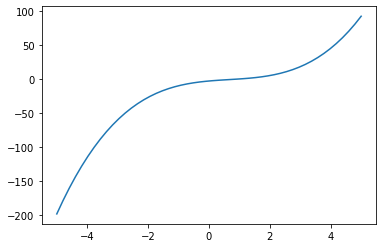

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-5,5)
y = p(x)
plt.plot(x,y)
plt.show()

Para calcular raíces de un polinomio con Python, podemos usar el método `r`, aplicado al polinomio. El resultado es un `array` con las raíces, posiblemente complejas conjugadas. 

Como ejemplo, las raíces del polinomio $p(x) = x^3 - 2x^2 + 4x-3$ son 
$$
    0.5 \pm 1.6583124 i, \quad 1
$$
Nótese que la unidad imaginaria, $i$, se denota con $j$ en Python.

In [19]:
p.r

array([0.5+1.6583124j, 0.5-1.6583124j, 1. +0.j       ])

Para verificar que los valores regresados son las raíces,

In [20]:
p(p.r)

array([1.33226763e-15-1.55431223e-15j, 1.33226763e-15+1.55431223e-15j,
       0.00000000e+00+0.00000000e+00j])

Los valores regresados son $(0,0,0)$ en la precisión de la computadora. 

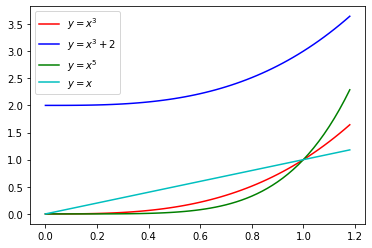

In [21]:
from numpy import arange, sin, cos
import matplotlib.pyplot as plt

x = arange(0.0, 1.2,0.02)
f1 = x**3
f2 = x**3 + 2
f3 = x**5
f4 = x

plt.plot(x, f1, 'r', label = '$y = x^3$')
plt.plot(x, f2, 'b', label = '$y = x^3 + 2$')
plt.plot(x, f3, 'g', label = '$y = x^5$')
plt.plot(x, f4, 'c', label = '$y = x$')
plt.legend()
plt.show()

# Derivadas

En este capítulo veremos tópicos relacionados con el *cambio* de una función. 

## Cambio promedio de una función
Si $y=f(x)$ es una función y $x_0$ es un punto en su dominio, entonces el _cambio promedio_ cuando pasamos de $x_0$ a $x_0+\Delta x$ es
$$
    \frac{\Delta f}{\Delta x} = \frac{f(x_0)+\Delta x) - f(x_0)}{\Delta x}.
$$
La expresión del cambio promedio se conoce como _cociente de Newton_ o _cociente incremental_. 

Si $f(x) = a +b x$, entonces el cambio promedio es constante, $\Delta f/\Delta x = b$. 

En el código a continuación, se prefiere usar $h=\Delta x$. 

### El módulo SymPy
A continuación se presentarán unos ejemplos del cálculo del promedio de una función usando el módulo SymPy (*Symbolic Python*). Este módulo permite la manipulación simbólica, no numérica, de funciones en Python.

Iniciamos con algunos ejemplos introductorios, como el manejo de números irracionales como $\pi$, $e$ (la base de los logaritmos naturales), entre otros.

In [22]:
import sympy as sym

In [23]:
sym.pi

pi

In [24]:
sym.exp(1)

E

Es importante enfatizar que la misma función matemática puede estar implementada en Python en módulos diferentes. 

Por ejemplo, la función `sqrt()` es implementada en los módulo `math` y `sympy`, con características diferentes. 

En el módulo `math`, `sqrt(2)=1.4142135623731`; en el módulo `sympy`, `sym.sqrt(2) = `$\sqrt 2$.

In [25]:
sym.pi**sqrt(2)

pi**1.4142135623731

In [26]:
sym.pi**sym.sqrt(2)

pi**(sqrt(2))

Es posible evaluar numéricamente una expresión de `sympy` usando el método `evalf()`, como se muestra a continuación:

In [27]:
(sym.pi**sym.sqrt(2)).evalf()

5.04749726737091

Si se requieren menos dígitos significativos, por ejemplo, 5 dígitos, entonces se puede pasar el número apropiado al método `evalf()`:

In [28]:
(sym.pi**sym.sqrt(2)).evalf(5)

5.0475

El parte fuerte de `sympy` está en la posibilidad de manipulaciones algebráicas simbólicas. 

In [29]:
a = sym.Rational(1,3)
b = sym.Rational(1, 2)
a + sym.sqrt(b)

1/3 + sqrt(2)/2

Comparado con

In [30]:
(1/3) + sqrt(1/2)

1.040440114519881

El módulo `sympy` incluye el símbolo `sym.oo` (dos 'o' minúsculas seguidas), que simboliza el infinito matemático

In [31]:
1/sym.oo

0

La siguiente condición lógica resulta verdadera, `True` cuando se compara `sym.oo` 
con números reales.

In [32]:
sym.oo > 10**(10000)

True

A continuación se muestran unos ejemplos de manipulación simbólica de `sympy`.

Empezamos con la simplificación de la expresión 
$$
    x+y-2x+3y
$$

In [33]:
x = sym.Symbol('x')
y = sym.Symbol('y')
x+y-2*x+3*y

-x + 4*y

Después, podemos expander la expresión $(x+y)^6$,

In [34]:
sym.expand((x + y) ** 6)

x**6 + 6*x**5*y + 15*x**4*y**2 + 20*x**3*y**3 + 15*x**2*y**4 + 6*x*y**5 + y**6

Podemos simplificar expresiones trigonométricas,

In [35]:
sym.trigsimp(sym.sin(x)/sym.cos(x)*(sym.sin(y)**2 - sym.cos(y)**2))

-cos(2*y)*tan(x)

Simplificar la expresión 
$$
    \frac{x + x \sin(x)}{x^2 - x\cos(x)}
$$

In [36]:
sym.simplify((x + x * sym.sin(x)) / (x**2 - x * sym.cos(x))) 

(sin(x) + 1)/(x - cos(x))

Resolver ecuaciones, lineales y no, de manera paramétrica, o no: 

In [37]:
a = sym.Symbol('a')
b = sym.Symbol('b')
c = sym.Symbol('c')
sym.solveset(a*x +b , x)

{-b/a}

In [38]:
sym.solveset(3*x + 4/5 , x)

{-0.266666666666667}

La bien conocida ecuación cuadrática, usando los símbolos definidos arriba:

In [39]:
sym.solveset(a*x**2 + b*x + c , x)

{-b/(2*a) - sqrt(-4*a*c + b**2)/(2*a), -b/(2*a) + sqrt(-4*a*c + b**2)/(2*a)}

Encontrar las raíces del polinomio $x^4 -16$:

In [40]:
sym.solveset(x ** 4 - 16, x)

{-2, 2, -2*I, 2*I}

#### Sistemas de ecuaciones lineales 

Considera el siguiente modelo de mercado, 
\begin{align*}
    D & = 12 - 2 P \\
    S & = -2 + 1.6 P
\end{align*}
Se quiere determinar el precio, $P$, y cantidad de equilibrio, $Q$.

Considerando que, en el equilibrio, $D=S=Q$, entonces, se debe resolver el sistema de ecuciones lineales
\begin{align*}
    0 & = 12 - 2 P - Q\\
    0 & = -2 + 1.6 P - Q
\end{align*}
Podemos usar la función `sym.solve()` para encontrar los valores de equilibrio:

In [41]:
P = sym.Symbol('P')
Q = sym.Symbol('Q')
equilibrio = sym.solve((- 2 * P - Q + 12, 1.6 * P - Q - 2), (P, Q))
equilibrio[P], equilibrio[Q]

(3.88888888888889, 4.22222222222222)

También se pueden resolver algunos sistemas no lineales. Por ejemplo,
\begin{align*}
    Q & = 12 -.05 P^2 - 2P \\
    Q & = -2 + 1.6 P
\end{align*}
En un contexto de equilibrio de mercado, el par $(P,Q)$ con valores negativos no es aceptable. 

In [42]:
sym.solve((- 2 * P - .05 * P ** 2 - Q + 12, 1.6 * P - Q - 2), (P, Q))

[(-75.6988664825584, -123.118186372093), (3.69886648255842, 3.91818637209347)]

### Cambios con SymPy
Usando el módulo `sympy` podemos realizar cálculos simbólicos y numéricos de las funciones elementales.

Iniciamos con el cálculo del cambio promedio de una función. Después, pasaremos al cálculo de las derivadas (tasa instantánea de cambio).

Como se mostrará abajo, el cambio promedio de la función $y=f(x)$ depende de cuánto cambia la variable $x$, es decir, de cuanto vale $\Delta x$. 

El cambio promedio se puede definir mediante la siguiente función de Python:

In [43]:
def cambioprom(f,x,h):
    df = (f(x+h)-f(x))/(h)
    return df

Calculamos el cambio promedio de la función $y = \sqrt x$, con $\Delta x = .001$:

In [44]:
df1 = cambioprom(sym.sqrt,1, .01)
print('El cambio promedio =', df1)

El cambio promedio = 0.498756211208895


Si $\Delta x = .0001$, el valor del cambio promedio también cambia:

In [45]:
df2 = cambioprom(sym.sqrt, 1, .0001)
df1 - df2

-0.00123128941507122

Calculamos, de manera simbólica, el cambio promedio de una función cuadrática
$$
    y = a x^2 + b x + c
$$

In [46]:
x = sym.Symbol('x')
a = sym.Symbol('a')
b = sym.Symbol('b')
c = sym.Symbol('c')
h = sym.Symbol('h')

def q(x):
        return a*x**2 + b*x + c
sym.simplify(cambioprom(q, 0, h))

a*h + b

Calculamos el cambio simbólico de la función
$$
    f(x) = x^3 + 3\sqrt x +2
$$

In [47]:
def f(x):
        return x**3 + 3*sym.sqrt(x) + 2
cambioprom(f, 1, h)

(3*sqrt(h + 1) + (h + 1)**3 - 4)/h

y después, usando $h = -.001$:

In [48]:
cambioprom(f, 1, -.001)

4.49737618761681

Cuando $h = .00001$, el cambio promedio de la función $f(x)$ es

In [49]:
cambioprom(f,1, .00001)

4.50002625012047

### Derivadas

En los ejemplos anteriores emerge cierto patrón: el cambio promedio se acerca a cierto valor, cuando el valor $h$ se acerca a cero. 

La derivada formaliza esta intuición, considerando el cambio promedio, cuando $h \to 0$:
$$
    f^\prime(x) = \lim_{h\to 0} \frac{f(x+h) - f(x)}{h},
$$
siempre y cuando el límite exista. 

En el módulo `sympy` se puede usar la función `sym.diff()` para calcular la derivada de una función, en un punto dado $x$. 

Por ejemplo, si 
$$
    f(x) = x^3 + 3\sqrt x +2
$$
su derivada es

In [50]:
sym.diff(f(x), x)

3*x**2 + 3/(2*sqrt(x))

Se puede también asignar el resultado de una derivada para calcular los valores de la variable donde la derivada es igual a cero. 

Por ejemplo, en el caso de la función cuadrática
$$
    q(x) = a x^2 + b x + c,
$$
$q^\prime(x) = 0$ cuando $x = -b/2a$:

In [51]:
fprime = sym.diff(q(x), x)
sym.solveset(fprime, x)

{-b/(2*a)}

In [52]:
h = sym.Symbol('h')
sym.expand((x + h) ** 3)

h**3 + 3*h**2*x + 3*h*x**2 + x**3

In [53]:
sym.diff(sym.sin(x) + x ** 4, x)

4*x**3 + cos(x)

In [54]:
sym.limit(sym.sin(x)/x, x, 0)

1